In [34]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
df = pd.read_csv(r"C:\Users\ailin\OneDrive\Documents\GitHub\Motor-Vehicle-Collisions-Crashes\Data\Motor_Vehicle_Collisions_-_Crashes_20250819.csv")

# Filter for Manhattan rows
df_manhattan = df[df['BOROUGH'] == 'MANHATTAN']

REQUIRED_COLS = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

df_manhattan = df_manhattan[REQUIRED_COLS]

print(df_manhattan.head())

# Save the filtered DataFrame to a new CSV file
output_file = r"C:\Users\ailin\OneDrive\Documents\GitHub\Motor-Vehicle-Collisions-Crashes\Data\manhattan_crashes.csv"
df_manhattan.to_csv(output_file, index=False)

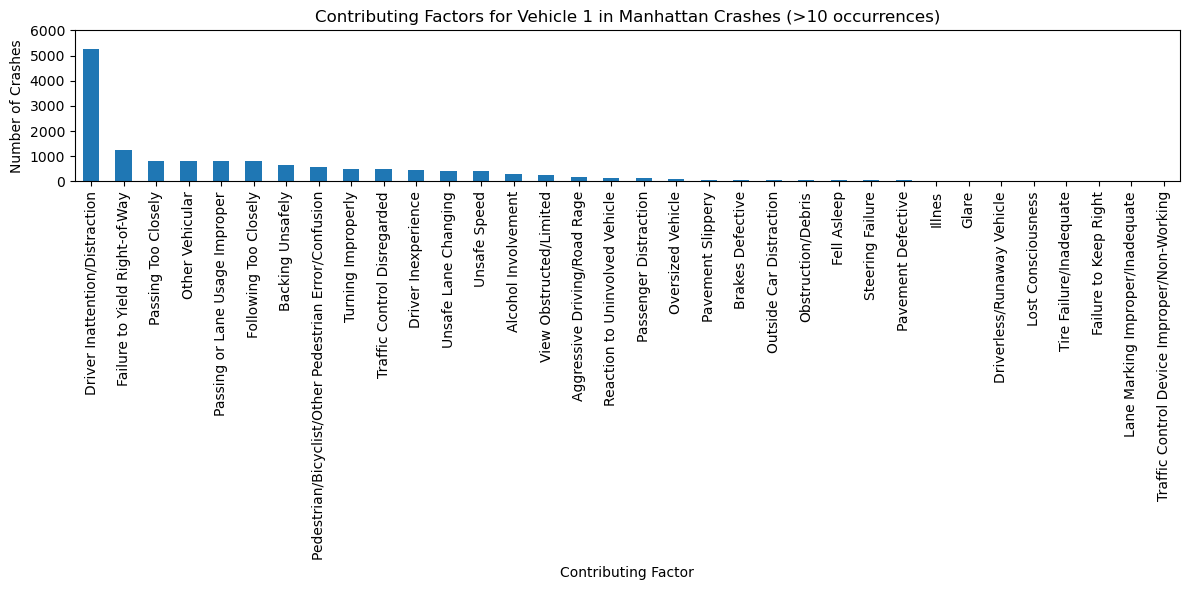

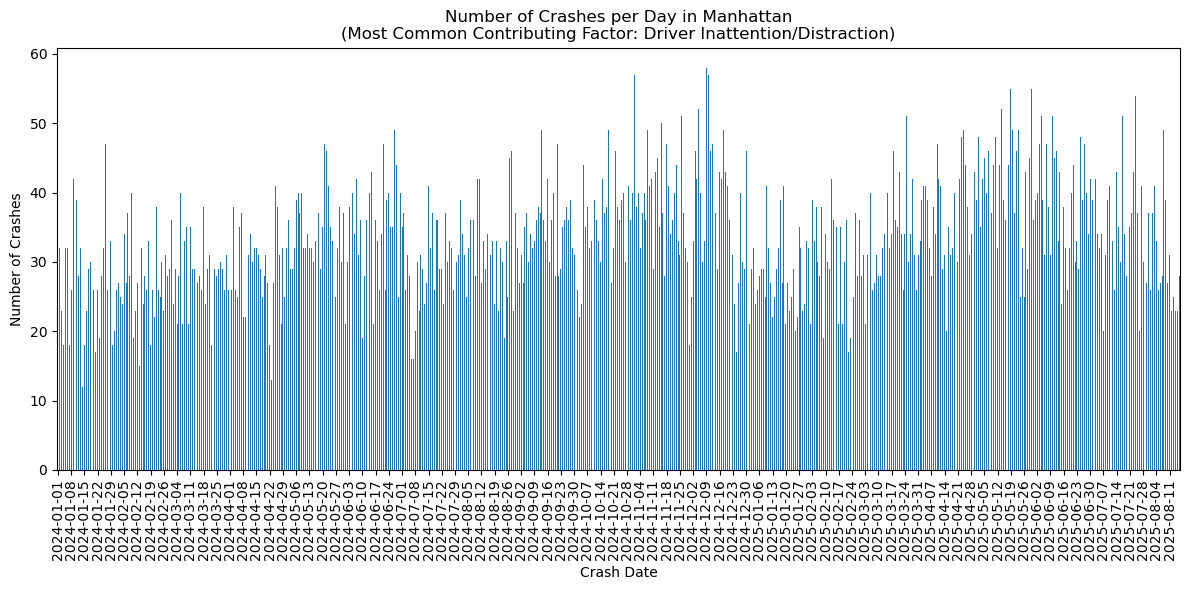

In [45]:
# Plot the number of crashes per day in Manhattan
df_manhattan['CRASH DATE'] = pd.to_datetime(df_manhattan['CRASH DATE'], format='%m/%d/%Y')
crashes_per_day = df_manhattan.groupby('CRASH DATE').size() 
# Remove 'Unspecified' and filter for factors with more than 10 crashes
factor_counts = df_manhattan['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
factor_counts = factor_counts.drop('Unspecified', errors='ignore')
factor_counts = factor_counts[factor_counts > 10]

# Plot as a bar chart with integer y-ticks
plt.figure(figsize=(12,6))
factor_counts.plot(kind='bar')
plt.title('Contributing Factors for Vehicle 1 in Manhattan Crashes (>10 occurrences)')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.yticks(np.arange(0, factor_counts.max()+1000, step=1000))  # y-axis labels every 1000
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
crashes_per_day.plot(kind='bar')
plt.title(f'Number of Crashes per Day in Manhattan\n(Most Common Contributing Factor: {most_common_factor})')
plt.xlabel('Crash Date')
plt.ylabel('Number of Crashes')

# Show only every 7th date label
xticks = plt.gca().get_xticks()
plt.gca().set_xticks(xticks[::7])
plt.gca().set_xticklabels([crashes_per_day.index[i].strftime('%Y-%m-%d') for i in range(0, len(crashes_per_day.index), 7)])

plt.tight_layout()
plt.show()